### Downloading MNIST and converting to array

In [50]:
# The MNIST data has been retrieved from this kaggle site: 
# https://www.kaggle.com/datasets/oddrationale/mnist-in-csv?resource=download
# Here I only use the MNIST_train.csv

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

5


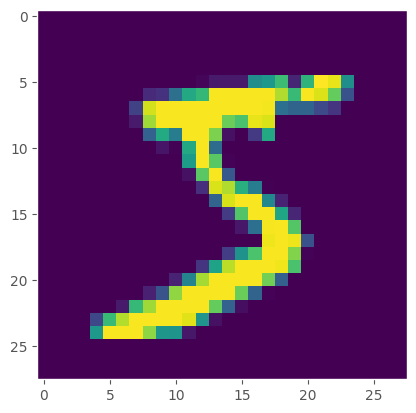

In [186]:
data = pd.read_csv("mnist_train.csv")

print(data.iloc[0][0])
plt.imshow(data.iloc[0][1:].values.reshape(28,28))
plt.grid(False)

threshold = 80
for column in data.columns[1:]:
    data[column] = (data[column] > threshold).astype(int)

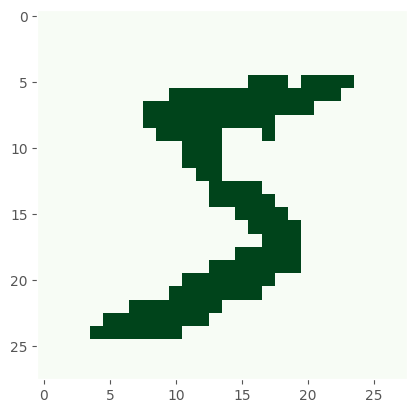

In [187]:
plt.imshow(data.iloc[0][1:].values.reshape(28,28), "Greens")
plt.grid(False)

In [188]:
probabilities = []

def normalize(data):
    min_val = min(data)
    max_val = max(data)
    range_val = max_val - min_val
    normalized_data = [(val - min_val) / range_val for val in data]
    return normalized_data


for i in range(1, 10):
    current_dataframe = data.iloc[(data["label"].values == i)]
    probs = current_dataframe.sum(axis=0).values / len(current_dataframe)

    probs = probs[1:]

    # max_prob = np.max(probs)
    # softmax = probs / max_prob-1e-6
    softmax = normalize(probs)

    probabilities.append(softmax)

probabilities = np.array(probabilities)
probabilities[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.00075019e-04, 3.00075019e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

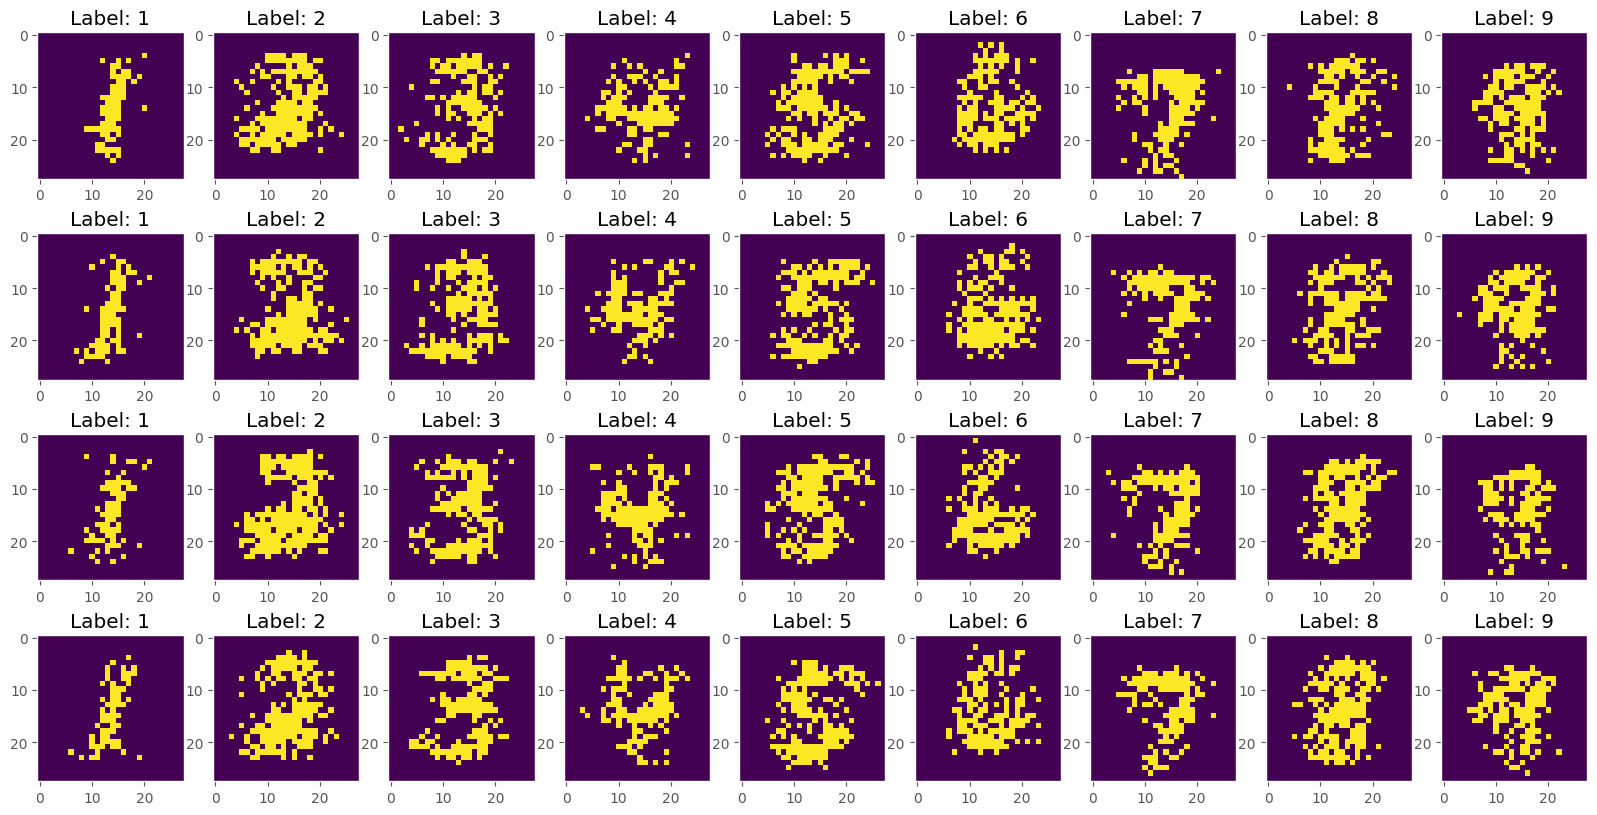

In [259]:
# Which picture do you want to produce?
wish = 3
rounds = 4

wish_dataframe = probabilities[wish-1]
results = np.empty(wish_dataframe.shape)

fig, axs = plt.subplots(rounds, 9, figsize=(20,rounds*2.5))
for round in range(rounds):
    for wish in range(1, 10):
        wish_dataframe = probabilities[wish-1]
        results = np.empty(wish_dataframe.shape)
        for i, p in enumerate(wish_dataframe):
            results[i] = np.random.binomial(1, p)
        axs[round, wish - 1].imshow(results.reshape(28,28))
        axs[round, wish - 1].set_title("Label: {}".format(wish))

plt.show()